In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.3.1+cu118'

In [2]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [3]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [4]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    plt.figure(figsize=(10, 7))
    
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", label="Predictions")
        
    plt.legend(prop={"size": 14})

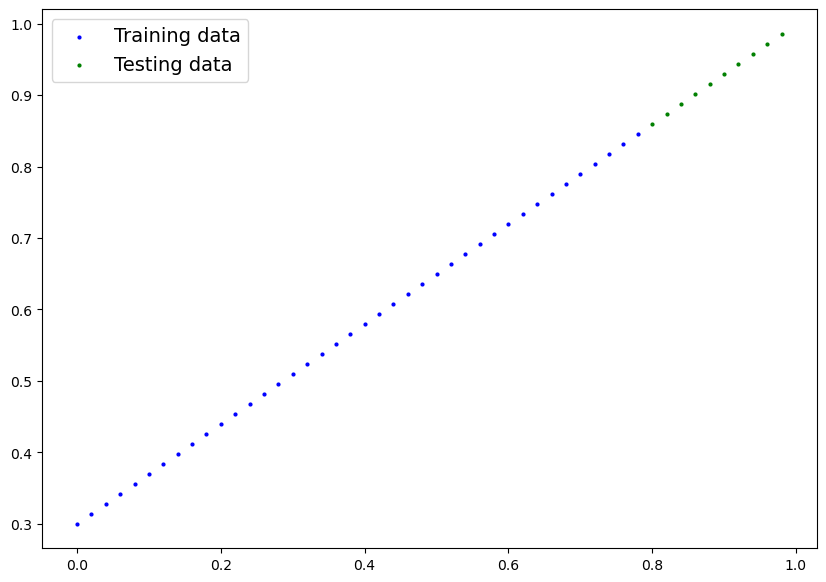

In [5]:
plot_predictions()

In [6]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float),
                                   requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float),
                                   requires_grad=True)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [7]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [8]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [9]:
with torch.inference_mode():
    y_preds = model_0(X_test)

In [10]:
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


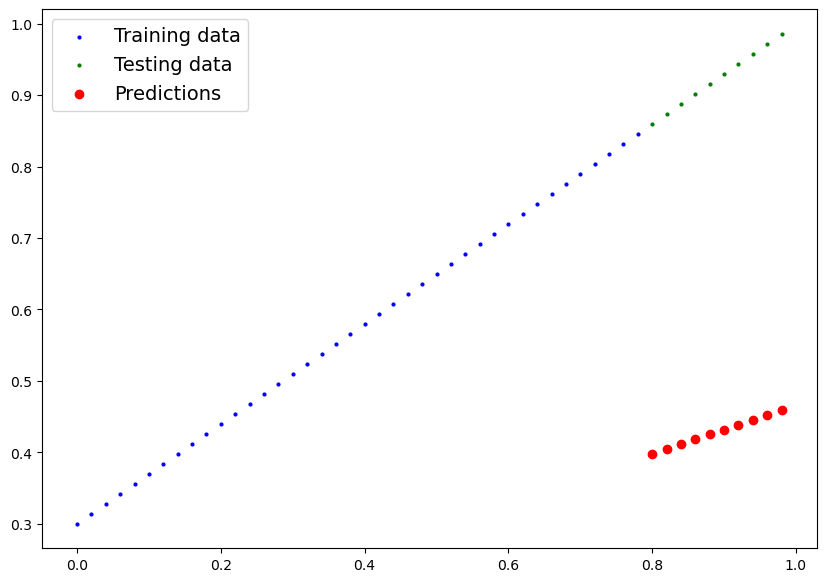

In [11]:
plot_predictions(predictions=y_preds)

In [12]:
y_test-y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

In [13]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [14]:
torch.manual_seed(42)

epochs = 100

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    
    model_0.train()
    
    y_pred = model_0(X_train)
    
    loss = loss_fn(y_pred, y_train)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    model_0.eval()
    
    with torch.inference_mode():
        test_pred = model_0(X_test)
        
        test_loss = loss_fn(test_pred, X_test)
        
        if epoch%10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss}")

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.4480651915073395
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3133552074432373
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.18429657816886902
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.11164019256830215
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.08060953766107559
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.06619948148727417
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.05586633086204529
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss: 0.04759376496076584
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.03963042423129082
Epoch: 90 | MAE Train Loss: 0.02788739837706089 | MAE Test Loss: 0.03325678035616875


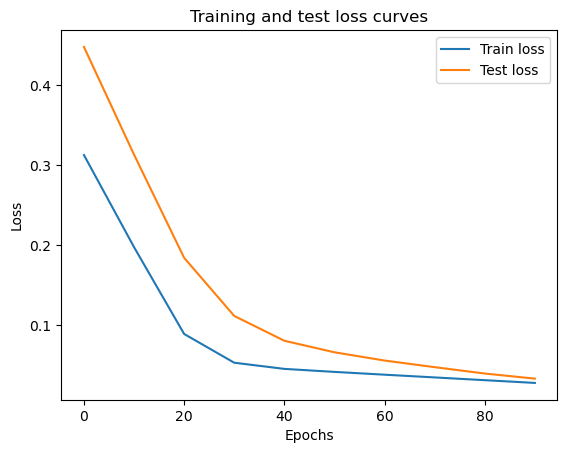

In [15]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [16]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [17]:
model_0.eval()

with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[0.8141],
        [0.8256],
        [0.8372],
        [0.8488],
        [0.8603],
        [0.8719],
        [0.8835],
        [0.8950],
        [0.9066],
        [0.9182]])

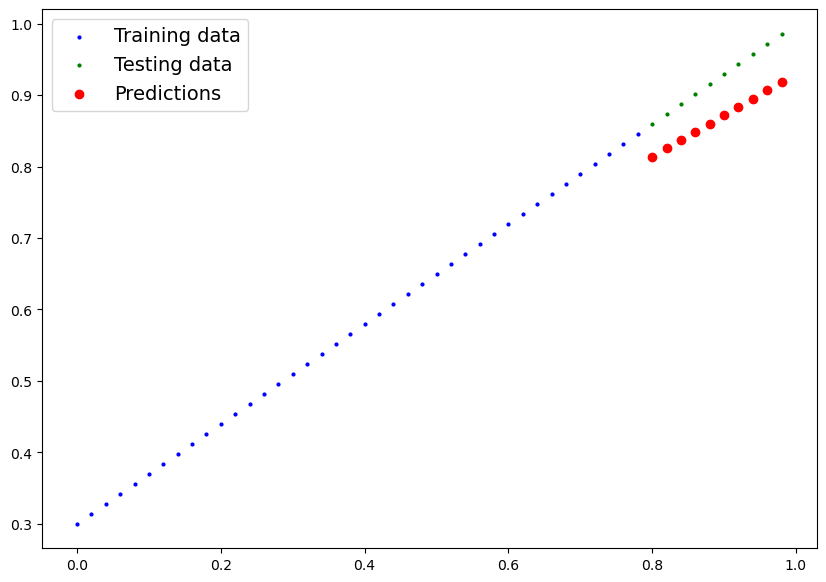

In [18]:
plot_predictions(predictions=y_preds)

In [19]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PTH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PTH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PTH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [21]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PTH))

<All keys matched successfully>

In [22]:
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

In [23]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [24]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [25]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias 
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [26]:
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

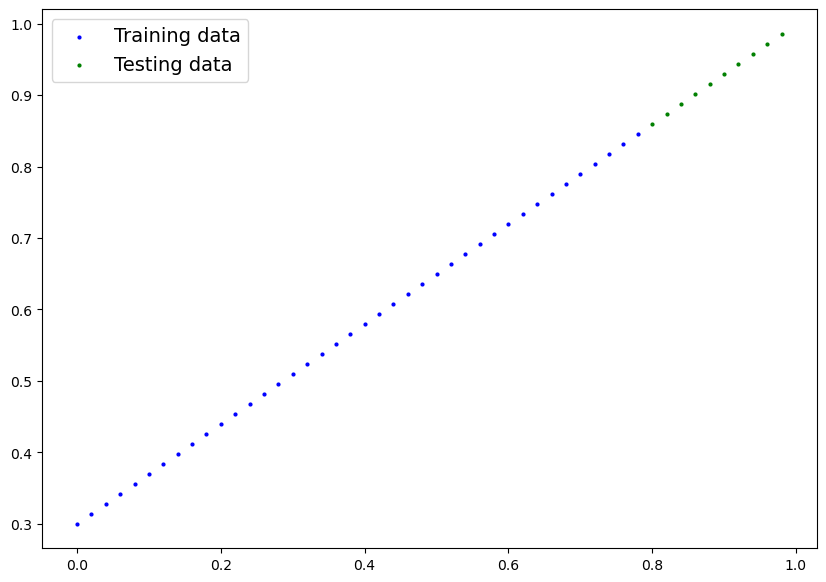

In [27]:
plot_predictions(X_train, y_train, X_test, y_test)

In [28]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

In [29]:
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [39]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.0001)

In [40]:
torch.manual_seed(42)

epochs = 1000

for epoch in range(epochs):
    model_1.train()
    
    y_pred = model_1(X_train)
    loss = loss_fn(y_pred, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    model_1.eval()
    
    with torch.inference_mode():
        y_preds = model_1(X_test)
        
        test_loss = loss_fn(y_preds, y_test)
    
    if epoch%100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 3.9219858081196435e-06 | Test loss: 0.0001327276258962229
Epoch: 100 | Train loss: 3.9219858081196435e-06 | Test loss: 0.0001327276258962229
Epoch: 200 | Train loss: 3.9219858081196435e-06 | Test loss: 0.0001327276258962229
Epoch: 300 | Train loss: 3.9219858081196435e-06 | Test loss: 0.0001327276258962229
Epoch: 400 | Train loss: 3.9219858081196435e-06 | Test loss: 0.0001327276258962229
Epoch: 500 | Train loss: 3.9219858081196435e-06 | Test loss: 0.0001327276258962229
Epoch: 600 | Train loss: 3.9219858081196435e-06 | Test loss: 0.0001327276258962229
Epoch: 700 | Train loss: 3.9219858081196435e-06 | Test loss: 0.0001327276258962229
Epoch: 800 | Train loss: 3.9219858081196435e-06 | Test loss: 0.0001327276258962229
Epoch: 900 | Train loss: 3.9219858081196435e-06 | Test loss: 0.0001327276258962229


In [36]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7000]])),
             ('linear_layer.bias', tensor([0.3001]))])

In [41]:
model_1.eval()

with torch.inference_mode():
    y_preds = model_1(X_test)

y_preds

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

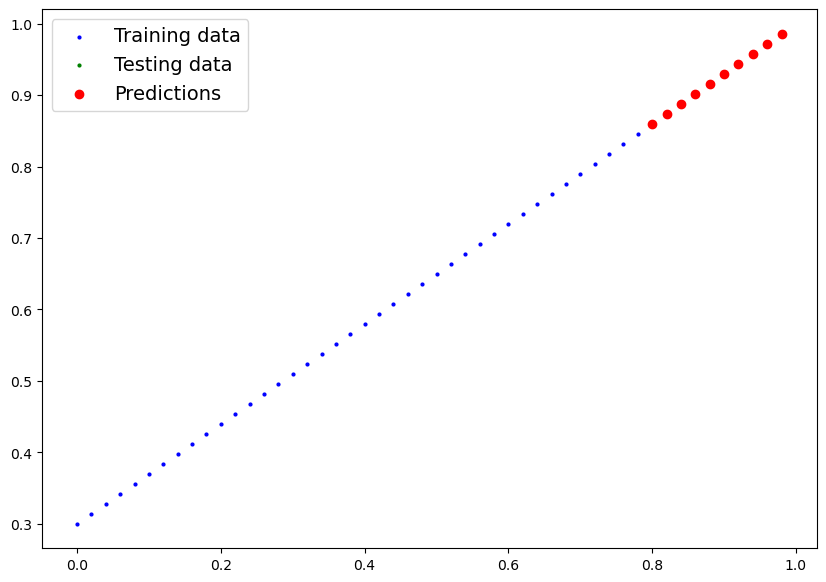

In [43]:
plot_predictions(predictions=y_preds)